<a href="https://colab.research.google.com/github/sudoaccessdenied/Human-Activity-Recognition-lstm/blob/main/Human_Activity_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Human Activity Recognition Using Accelerometer

## Download Dataset

In [2]:
import urllib.request

print('Downloading dataset')

url = 'https://www.utwente.nl/en/eemcs/ps/dataset-folder/sensors-activity-recognition-dataset-shoaib.rar'
urllib.request.urlretrieve(url, 'HAR_dataset.rar')

print('Download completed')

Download completed


# Download and install libraries

In [3]:
# !pip3 install tensorflow
# !pip3 install tensorflow-gpu
# !pip3 install keras
# !pip3 install pandas
# !pip3 install numpy

!pip3 install pyunpack
!pip3 install patool

     |████████████████████████████████| 81kB 5.6MB/s 


#Extract Dataset

In [1]:

from pyunpack import Archive
Archive('HAR_dataset.rar').extractall('.')

# Import Libraries

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# Load All Files

In [102]:
path='DataSet/'
files=[file for file in os.listdir(path) if file.endswith('.csv')]
files

['Participant_1.csv',
 'Participant_5.csv',
 'Participant_9.csv',
 'Participant_8.csv',
 'Participant_10.csv',
 'Participant_2.csv',
 'Participant_4.csv',
 'Participant_7.csv',
 'Participant_3.csv',
 'Participant_6.csv']

# Representing all the labels in graph

In [103]:
df = pd.read_csv(path+files[0],header=1)
df.head()
df['Unnamed: 69'].unique()

array(['walking', 'standing', 'jogging', 'sitting', 'biking', 'upstairs',
       'downstairs'], dtype=object)

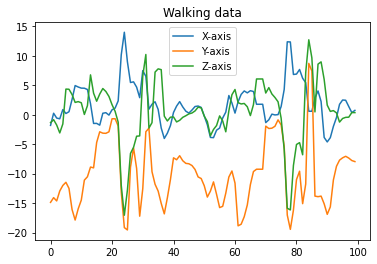

In [104]:
plt.plot(np.arange(0,100),df.Ax[df['Unnamed: 69']=='walking'][:100],label ="X-axis")
plt.plot(np.arange(0,100),df.Ay[df['Unnamed: 69']=='walking'][:100],label ="Y-axis")
plt.plot(np.arange(0,100),df.Az[df['Unnamed: 69']=='walking'][:100],label ="Z-axis")
plt.title("Walking data")
plt.legend()

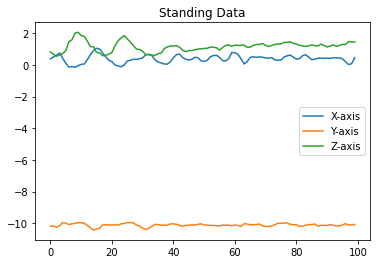

In [105]:
plt.plot(np.arange(0,100),df.Ax[df['Unnamed: 69']=='standing'][:100],label ="X-axis")
plt.plot(np.arange(0,100),df.Ay[df['Unnamed: 69']=='standing'][:100],label ="Y-axis")
plt.plot(np.arange(0,100),df.Az[df['Unnamed: 69']=='standing'][:100],label ="Z-axis")
plt.title("Standing Data")
plt.legend()

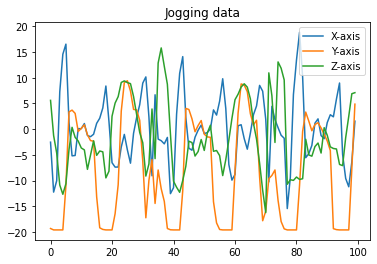

In [106]:
plt.plot(np.arange(0,100),df.Ax[df['Unnamed: 69']=='jogging'][:100],label ="X-axis")
plt.plot(np.arange(0,100),df.Ay[df['Unnamed: 69']=='jogging'][:100],label ="Y-axis")
plt.plot(np.arange(0,100),df.Az[df['Unnamed: 69']=='jogging'][:100],label ="Z-axis")
plt.title("Jogging data")
plt.legend()

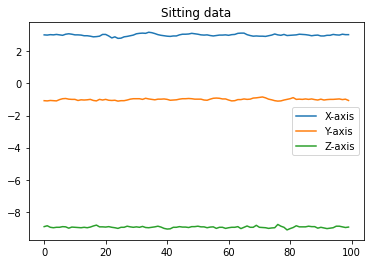

In [107]:
plt.plot(np.arange(0,100),df.Ax[df['Unnamed: 69']=='sitting'][:100],label ="X-axis")
plt.plot(np.arange(0,100),df.Ay[df['Unnamed: 69']=='sitting'][:100],label ="Y-axis")
plt.plot(np.arange(0,100),df.Az[df['Unnamed: 69']=='sitting'][:100],label ="Z-axis")
plt.title("Sitting data")
plt.legend()

# Concatenation of all files by different volunteers

In [108]:
df = pd.DataFrame()

for file in files:
  temp_df = pd.read_csv(path+file,header=1)
  df= pd.concat([df,temp_df],sort=False)

df.shape

(630000, 70)

In [109]:
df.head()

,time_stamp,Ax,Ay,Az,Lx,Ly,Lz,Gx,Gy,Gz,Mx,My,Mz,Unnamed: 13,time_stamp.1,Ax.1,Ay.1,Az.1,Lx.1,Ly.1,Lz.1,Gx.1,Gy.1,Gz.1,Mx.1,My.1,Mz.1,Unnamed: 27,time_stamp.2,Ax.2,Ay.2,Az.2,Lx.2,Ly.2,Lz.2,Gx.2,Gy.2,Gz.2,Mx.2,My.2,Mz.2,Unnamed: 41,time_stamp.3,Ax.3,Ay.3,Az.3,Lx.3,Ly.3,Lz.3,Gx.3,Gy.3,Gz.3,Mx.3,My.3,Mz.3,Unnamed: 55,time_stamp.4,Ax.4,Ay.4,Az.4,Lx.4,Ly.4,Lz.4,Gx.4,Gy.4,Gz.4,Mx.4,My.4,Mz.4,Unnamed: 69
0,1.390000e+12,-1.81150,-14.873,-1.34840,-1.26910,-5.1057,-0.66445,-0.53206,-3.18690,0.23976,12.72,40.74,-6.00,NaN,1.390000e+12,-1.19860,-13.852,3.7865,-1.76980,-4.0625,3.89850,-3.6255,1.07390,0.13622,18.84,55.92,-6.72,NaN,1.390000e+12,0.17706,-10.569,1.8251,-7.5051,-4.7736,-0.062476,-0.36652,1.27060,-0.52412,-30.30,31.08,3.96,NaN,1.390000e+12,2.79220,-12.5720,-4.3177,-0.098712,-3.385700,-2.46480,0.021075,1.02990,1.22690,-18.72,31.74,17.82,NaN,1.390000e+12,4.3177,-2.36990,-0.43585,-5.3574,-0.95749,0.318860,0.52565,-0.18815,0.285880,-22.20,6.48,4.56,walking
1,1.390000e+12,0.24517,-14.070,-0.84446,0.70147,-4.2969,-0.17199,-0.25229,-1.79660,0.40745,12.54,40.74,-6.78,NaN,1.390000e+12,-2.38360,-16.590,2.9965,-2.70250,-6.7890,2.86820,-3.4899,0.39034,0.40073,18.60,55.86,-6.06,NaN,1.390000e+12,0.16344,-12.190,2.0703,-7.3573,-6.2618,-0.042442,-0.54459,1.28070,0.34025,-31.02,29.88,3.36,NaN,1.390000e+12,2.38360,-10.9920,-4.6037,-0.404440,-1.774500,-2.74830,0.201890,0.53573,1.32280,-18.84,31.74,17.70,NaN,1.390000e+12,5.1213,-2.19290,-0.70826,-4.5352,-0.67629,0.081656,0.43616,0.16371,0.198230,-21.90,7.14,5.34,walking
2,1.390000e+12,-0.57205,-14.628,-1.75700,-0.21760,-4.8531,-1.05650,-1.04920,0.29138,0.29230,12.42,40.68,-8.10,NaN,1.390000e+12,-4.63090,-16.603,2.0703,-4.34550,-6.8081,1.68890,-3.3851,-1.99200,1.12280,18.72,55.80,-4.26,NaN,1.390000e+12,0.57205,-12.626,2.2474,-6.7655,-6.5138,0.017921,-0.70952,1.15820,0.99724,-31.26,29.22,3.24,NaN,1.390000e+12,1.56630,-9.0848,-4.5764,-1.003600,0.201530,-2.75150,0.287720,0.10049,1.20710,-19.02,31.68,17.52,NaN,1.390000e+12,5.6116,-2.12480,-1.26670,-4.0408,-0.55974,-0.523690,0.32284,0.43127,0.211970,-21.60,7.50,5.64,walking
3,1.390000e+12,-0.69464,-12.939,-3.09180,-0.32273,-3.1786,-2.21970,-2.37200,1.00820,0.34972,12.30,40.74,-8.52,NaN,1.390000e+12,-4.78070,-16.453,1.1577,-4.19540,-6.6731,0.74084,-3.1017,-3.04390,0.79138,18.84,55.62,-3.12,NaN,1.390000e+12,1.21220,-12.476,2.2882,-5.9716,-6.1990,0.016760,-0.78191,1.10200,1.33380,-31.44,28.80,3.24,NaN,1.390000e+12,-0.61292,-8.5263,-2.9284,-2.827100,0.859490,-1.14670,0.175930,-0.21441,0.90469,-18.96,31.86,17.22,NaN,1.390000e+12,6.0611,-1.47100,-2.47890,-3.5908,0.15795,-1.880200,0.20403,0.72846,0.164930,-21.12,8.40,6.12,walking
4,1.390000e+12,0.87170,-12.000,-1.56630,1.13740,-2.2390,-0.65476,-2.79010,0.65485,0.22724,12.24,40.80,-8.88,NaN,1.390000e+12,-0.92618,-12.190,-1.0624,-0.18116,-2.4144,-1.28500,-2.7587,-4.46020,0.69364,19.38,55.44,-0.84,NaN,1.390000e+12,2.24740,-11.387,1.9886,-4.6603,-4.8230,-0.329740,-0.82436,0.90561,2.15600,-31.56,28.32,3.30,NaN,1.390000e+12,-1.18500,-9.3436,-2.2337,-3.209900,0.085583,-0.45569,-0.033292,-0.48625,0.60720,-18.84,32.10,17.04,NaN,1.390000e+12,7.7091,-0.77636,-3.54130,-1.9450,0.85796,-2.995300,0.09896,0.94379,0.064752,-20.94,8.70,6.30,walking


# Extracting left pocket and right pocket data excluding magnetometer data

In [110]:
leftPocket = df[df.columns[1:10]]
leftPocket.head()

,Ax,Ay,Az,Lx,Ly,Lz,Gx,Gy,Gz
0,-1.81150,-14.873,-1.34840,-1.26910,-5.1057,-0.66445,-0.53206,-3.18690,0.23976
1,0.24517,-14.070,-0.84446,0.70147,-4.2969,-0.17199,-0.25229,-1.79660,0.40745
2,-0.57205,-14.628,-1.75700,-0.21760,-4.8531,-1.05650,-1.04920,0.29138,0.29230
3,-0.69464,-12.939,-3.09180,-0.32273,-3.1786,-2.21970,-2.37200,1.00820,0.34972
4,0.87170,-12.000,-1.56630,1.13740,-2.2390,-0.65476,-2.79010,0.65485,0.22724


In [111]:
rightPocket = df[df.columns[15:24]]
rightPocket.columns = leftPocket.columns
rightPocket.head()

,Ax,Ay,Az,Lx,Ly,Lz,Gx,Gy,Gz
0,-1.19860,-13.852,3.7865,-1.76980,-4.0625,3.89850,-3.6255,1.07390,0.13622
1,-2.38360,-16.590,2.9965,-2.70250,-6.7890,2.86820,-3.4899,0.39034,0.40073
2,-4.63090,-16.603,2.0703,-4.34550,-6.8081,1.68890,-3.3851,-1.99200,1.12280
3,-4.78070,-16.453,1.1577,-4.19540,-6.6731,0.74084,-3.1017,-3.04390,0.79138
4,-0.92618,-12.190,-1.0624,-0.18116,-2.4144,-1.28500,-2.7587,-4.46020,0.69364


#Concatenating left and right pocket data

In [112]:
train_df = pd.concat([leftPocket,rightPocket],sort= False)
train_df.head()

,Ax,Ay,Az,Lx,Ly,Lz,Gx,Gy,Gz
0,-1.81150,-14.873,-1.34840,-1.26910,-5.1057,-0.66445,-0.53206,-3.18690,0.23976
1,0.24517,-14.070,-0.84446,0.70147,-4.2969,-0.17199,-0.25229,-1.79660,0.40745
2,-0.57205,-14.628,-1.75700,-0.21760,-4.8531,-1.05650,-1.04920,0.29138,0.29230
3,-0.69464,-12.939,-3.09180,-0.32273,-3.1786,-2.21970,-2.37200,1.00820,0.34972
4,0.87170,-12.000,-1.56630,1.13740,-2.2390,-0.65476,-2.79010,0.65485,0.22724


In [113]:
train_df.shape

(1260000, 9)

# Restoring labels in dataframe

In [114]:
labels = pd.concat([df['Unnamed: 69'],df['Unnamed: 69']],sort=False)
labels.column = ["Activity"]
train_df['Activity'] = labels
train_df

,Ax,Ay,Az,Lx,Ly,Lz,Gx,Gy,Gz,Activity
0,-1.81150,-14.8730,-1.34840,-1.26910,-5.1057,-0.66445,-0.53206,-3.18690,0.239760,walking
1,0.24517,-14.0700,-0.84446,0.70147,-4.2969,-0.17199,-0.25229,-1.79660,0.407450,walking
2,-0.57205,-14.6280,-1.75700,-0.21760,-4.8531,-1.05650,-1.04920,0.29138,0.292300,walking
3,-0.69464,-12.9390,-3.09180,-0.32273,-3.1786,-2.21970,-2.37200,1.00820,0.349720,walking
4,0.87170,-12.0000,-1.56630,1.13740,-2.2390,-0.65476,-2.79010,0.65485,0.227240,walking
...,...,...,...,...,...,...,...,...,...,...
62995,-1.53910,-3.0373,-0.89894,-0.46261,5.3391,4.08570,-0.34728,0.87109,0.262370,downstairs
62996,-1.53910,-4.6990,1.41650,-0.30650,3.9026,5.96230,0.27978,-0.10354,0.066890,downstairs
62997,-1.74340,-14.2610,-4.87610,-0.51863,-5.4284,-0.79386,-0.52687,-0.35613,-0.003971,downstairs
62998,2.60150,-17.5430,0.47671,3.31990,-8.3374,3.77980,-0.53420,-0.52168,-0.743730,downstairs


In [115]:
train_df.Activity.unique()

array(['walking', 'standing', 'jogging', 'sitting', 'biking', 'upstairs',
       'downstairs', 'upsatirs'], dtype=object)

# Correcting the labels

In [116]:
train_df.Activity.loc[(train_df.Activity == 'upsatirs')] = 'upstairs'
train_df.Activity.unique()

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


array(['walking', 'standing', 'jogging', 'sitting', 'biking', 'upstairs',
       'downstairs'], dtype=object)

#Export our Training Data

In [117]:
train_df.to_csv('dataset.csv')

# Preprocessing The data

In [118]:
x_train = train_df[train_df.columns[:9]]
y_train = train_df[train_df.columns[9:10]]

In [119]:
x_train.head()

,Ax,Ay,Az,Lx,Ly,Lz,Gx,Gy,Gz
0,-1.81150,-14.873,-1.34840,-1.26910,-5.1057,-0.66445,-0.53206,-3.18690,0.23976
1,0.24517,-14.070,-0.84446,0.70147,-4.2969,-0.17199,-0.25229,-1.79660,0.40745
2,-0.57205,-14.628,-1.75700,-0.21760,-4.8531,-1.05650,-1.04920,0.29138,0.29230
3,-0.69464,-12.939,-3.09180,-0.32273,-3.1786,-2.21970,-2.37200,1.00820,0.34972
4,0.87170,-12.000,-1.56630,1.13740,-2.2390,-0.65476,-2.79010,0.65485,0.22724


In [120]:
y_train.head()

,Activity
0,walking
1,walking
2,walking
3,walking
4,walking


In [121]:
y_train.Activity.unique()

array(['walking', 'standing', 'jogging', 'sitting', 'biking', 'upstairs',
       'downstairs'], dtype=object)

# Encoding the text label into numbers

In [122]:
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()
y_train=encoder.fit_transform(y_train)
y_train[:10]

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([6, 6, 6, 6, 6, 6, 6, 6, 6, 6])

# Splitting the data

In [123]:
def train_test_split(X, y, split_size=0.8):
    split= int(len(X) * split_size)
    print(split)
    train_x = X[:split]
    train_y = y[:split]
    test_x = X[split:]
    test_y = y[split:]
    return train_x, test_x, train_y, test_y

x_train,x_test,y_train, y_test =train_test_split(x_train, y_train)

print("X_train shape ", x_train.shape)
print("Y train shape ", y_train.shape)
print("X_test shape ", x_test.shape)
print("y_test shape ", y_test.shape)

1008000
X_train shape  (1008000, 9)
Y train shape  (1008000,)
X_test shape  (252000, 9)
y_test shape  (252000,)


# Converting data into time series

In [124]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,LSTM
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
import tensorflow as tf


# **Converting** to time series Tx= 100

In [125]:

from keras.preprocessing.sequence import TimeseriesGenerator

n_time_steps = 100
n_features = 9

train_gen = TimeseriesGenerator(x_train.to_numpy(), y_train, length=n_time_steps, batch_size=1024)
test_gen = TimeseriesGenerator(x_test.to_numpy(), y_test, length=n_time_steps, batch_size=1024)

# Building Model 

In [126]:
model=Sequential()
model.add(LSTM(32, return_sequences=True, input_shape = (n_time_steps, n_features),
              kernel_regularizer = l2(0.000001), bias_regularizer = l2(0.000001), name='lstm_1'))
model.add(Flatten(name='flatten'))
model.add(Dense(64, activation='relu',kernel_regularizer = l2(0.000001), bias_regularizer = l2(0.000001), name='dense_1' ))
model.add(Dense(len(np.unique(y_train)), activation='softmax', 
                kernel_regularizer = l2(0.000001), bias_regularizer = l2(0.000001), name='output'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100, 32)           5376      
_________________________________________________________________
flatten (Flatten)            (None, 3200)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                204864    
_________________________________________________________________
output (Dense)               (None, 7)                 455       
Total params: 210,695
Trainable params: 210,695
Non-trainable params: 0
_________________________________________________________________


In [127]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [128]:
from keras.callbacks import ModelCheckpoint

callbacks= [ModelCheckpoint('model.h5', save_weights_only=False, save_best_only=True, verbose=1)]

# Training and saving best trained model in model.h5

In [129]:
history = model.fit(train_gen, epochs=5, validation_data=test_gen, callbacks=callbacks)

Epoch 1/5
985/985 [==============================] - 14s 13ms/step - loss: 0.8010 - accuracy: 0.7381 - val_loss: 0.0652 - val_accuracy: 0.9879

Epoch 00001: val_loss improved from inf to 0.06521, saving model to model.h5
Epoch 2/5
985/985 [==============================] - 12s 12ms/step - loss: 0.1135 - accuracy: 0.9738 - val_loss: 0.0594 - val_accuracy: 0.9891

Epoch 00002: val_loss improved from 0.06521 to 0.05937, saving model to model.h5
Epoch 3/5
985/985 [==============================] - 12s 12ms/step - loss: 0.0518 - accuracy: 0.9880 - val_loss: 0.1677 - val_accuracy: 0.9579

Epoch 00003: val_loss did not improve from 0.05937
Epoch 4/5
985/985 [==============================] - 12s 12ms/step - loss: 0.0642 - accuracy: 0.9859 - val_loss: 0.0431 - val_accuracy: 0.9896

Epoch 00004: val_loss improved from 0.05937 to 0.04314, saving model to model.h5
Epoch 5/5
985/985 [==============================] - 12s 12ms/step - loss: 0.0339 - accuracy: 0.9925 - val_loss: 0.0330 - val_accuracy

# Loading the model.h5 and Saving as SavedModel format

In [130]:
from tensorflow.keras.models import load_model
model=load_model('model.h5')
model.summary()
model.save("model")

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100, 32)           5376      
_________________________________________________________________
flatten (Flatten)            (None, 3200)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                204864    
_________________________________________________________________
output (Dense)               (None, 7)                 455       
Total params: 210,695
Trainable params: 210,695
Non-trainable params: 0
_________________________________________________________________


INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


# Loading the SavedModel and test the accuracy

In [131]:
model=load_model('model')
model.summary()
loss, acc = model.evaluate(test_gen, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100, 32)           5376      
_________________________________________________________________
flatten (Flatten)            (None, 3200)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                204864    
_________________________________________________________________
output (Dense)               (None, 7)                 455       
Total params: 210,695
Trainable params: 210,695
Non-trainable params: 0
_________________________________________________________________
246/246 - 2s - loss: 0.0330 - accuracy: 0.9925
Restored model, accuracy: 99.25%


# Converting to TF lite model for android

In [132]:
tf_converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflit_model = tf_converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmpcqakrfkm/assets


INFO:tensorflow:Assets written to: /tmp/tmpcqakrfkm/assets


In [133]:
open("model.tflite","wb").write(tflit_model)

853344

Input Shape :(None, 100, 9)
Generate predictions for 100 samples


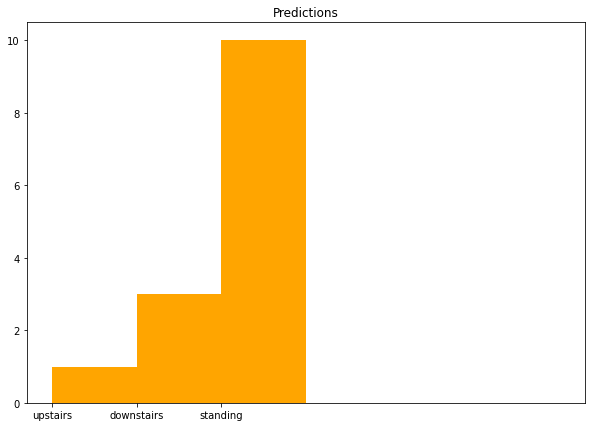

In [167]:
print( "Input Shape :" +str(model.input_shape))

print("Generate predictions for 100 samples")
predictions =[]
n_of_sample = 100
for i in range(1,n_of_sample*100,100):
  testSequence = x_test[i:i+100]
  prob = model.predict(tf.reshape(testSequence,[1,100,9]))
  predictions.append(np.argmax(prob))


labels = encoder.inverse_transform(predictions)


  
# Creating histogram 
fig, ax = plt.subplots(figsize =(10, 7)) 
ax.hist(labels, bins = [1,2 , 3, 4, 5,6,7] ,color =["orange"]) 
  
# show plot 
plt.title("Predictions")
# plt.legend()
plt.show() 

# for val in predictions:
  # print("Prediction :"+val)


(None, 100, 9)
(100, 100, 9)


In [84]:
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()

array = ["a","b","c","d"]
array= encoder.fit_transform(array)
# print(encoder.classes_)

print(array)
# y_train[:10]
print(encoder.inverse_transform([1,2,3]))

[0 1 2 3]
['b' 'c' 'd']
